<a href="https://colab.research.google.com/github/novay/amikom/blob/main/Artificial_Neural_Network_03_Loan_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table border='0'>
<tr>
  <td width='30%' bgcolor='ffffff'><figure>
  <center>
  <img src='https://scholar.google.co.id/citations?view_op=view_photo&user=IfPNmVoAAAAJ&citpid=1' width='100%' height='100%' />
  </center>
  </figure>
  </td>
  <td bgcolor='ffffff'>
    <h1 align='left'>Machine Learning</h1>
    <h1 align='left'>Artificial Neural Network (ANN)</h1>
  <p align="left">
  Lecturer : Dr. Andi Sunyoto, M.Kom <br />
  Email : andi@amikom.ac.id <br />
  Course : Hands-On of Artificial Intelligence <br />
  </p>
  </td>
</tr>
</table>

---

### **IDENTITAS MAHASISWA**
Nama : **Novianto Rahmadi (22.55.2293)**<br/>
Konsentrasi : **Business Inteligence**<br/>
Tugas Ke : **2 (Dua)**<br/>
Mata Kuliah : **Business Inteligence (BI)**<br/>
Lecturer : **Dr. Andi Sunyoto, M.Kom**

# **A. Load Data**

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1. Dataset: Loan Approval Data Set**

URL Dataset: [https://www.kaggle.com/datasets/granjithkumar/loan-approval-data-set/data](https://www.kaggle.com/datasets/granjithkumar/loan-approval-data-set/data)

In [93]:
import pandas as pd

url = "/content/drive/MyDrive/Datasets/Loan_Dataset.csv"

loan = pd.read_csv(url)
loan.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


## **2. DATA PROCESSING (TASK)**

Sesuai dengan arahan tugas, berikut eksekusi dari mahasiswa terkait source code yang di berikan. **Tahap pertama**, akan dilakukan **Analisa dan Preprocessing** pada dataset yang tersedia dengan langkah-langkah berikut:

### **1. Pastikan tidak ada data yang bernilai NULL atau NaN.**

In [98]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [99]:
def drop_missing_rows(data):
    return data.dropna()

In [100]:
loan = drop_missing_rows(loan.copy())

### **2. Hapus Kolom yang Tidak Diperlukan**

Dalam hal ini adalah kolom `Loan_ID`

In [101]:
def drop_column(data, column_name):
    return data.drop(column_name, axis=1)

In [102]:
loan = drop_column(loan.copy(), "Loan_ID")
loan.sample(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
354,Female,Yes,0,Graduate,No,2423,505.0,130.0,360.0,1.0,Semiurban,Y
179,Male,No,0,Not Graduate,No,2333,1451.0,102.0,480.0,0.0,Urban,N
177,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N


### **2. Konversi semua elemen data menjadi** *Numerik*

In [103]:
Gender_counts = loan['Gender'].value_counts()
print(Gender_counts)
print('---------------')
Married_counts = loan['Married'].value_counts()
print(Married_counts)
print('---------------')
Dependents_counts = loan['Dependents'].value_counts()
print(Dependents_counts)
print('---------------')
Self_Employed_counts = loan['Self_Employed'].value_counts()
print(Self_Employed_counts)
print('---------------')
ApplicantIncome_counts = loan['ApplicantIncome'].value_counts()
print(ApplicantIncome_counts)
print('---------------')
CoapplicantIncome_counts = loan['CoapplicantIncome'].value_counts()
print(CoapplicantIncome_counts)
print('---------------')
LoanAmount_counts = loan['LoanAmount'].value_counts()
print(LoanAmount_counts)
print('---------------')
Loan_Amount_Term_counts = loan['Loan_Amount_Term'].value_counts()
print(Loan_Amount_Term_counts)
print('---------------')
Credit_History_counts = loan['Credit_History'].value_counts()
print(Credit_History_counts)
print('---------------')
Property_Area_counts = loan['Property_Area'].value_counts()
print(Property_Area_counts)
print('---------------')
Loan_Status_counts = loan['Loan_Status'].value_counts()
print(Loan_Status_counts)

Gender
Male      394
Female     86
Name: count, dtype: int64
---------------
Married
Yes    311
No     169
Name: count, dtype: int64
---------------
Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64
---------------
Self_Employed
No     414
Yes     66
Name: count, dtype: int64
---------------
ApplicantIncome
2500    7
4583    6
2600    5
6000    4
4166    4
       ..
3418    1
3975    1
3244    1
4408    1
7583    1
Name: count, Length: 405, dtype: int64
---------------
CoapplicantIncome
0.0       216
1666.0      5
2500.0      4
5625.0      3
2083.0      3
         ... 
1250.0      1
3021.0      1
983.0       1
1775.0      1
240.0       1
Name: count, Length: 232, dtype: int64
---------------
LoanAmount
120.0    13
100.0    13
110.0    13
187.0    12
128.0     9
         ..
280.0     1
240.0     1
214.0     1
59.0      1
253.0     1
Name: count, Length: 186, dtype: int64
---------------
Loan_Amount_Term
360.0    411
180.0     36
480.0     12
300.0      9
120.0

In [104]:
data_types = loan.dtypes
print(data_types)

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


Dari informasi nilai diatas, bisa disimpulkan eksekusi yang **PERLU** dilakukan untuk masing-masing **kolom non-numerik (object)** adalah sebagai berikut :

1. Gender : `Male=1` dan `Female=0`
2. Married : `Yes=1` dan `No=0`
3. Education : `Graduate=1` dan `Graduate=0`
4. Self_Employed : `Yes=1` dan `No=0`
5. Property_Area : `Rural=0`, `Semiurban=1` dan `Urban=2`
6. Loan_Status : `Y=1` dan `N=0`

Khusus untuk kolom poin ke **7. Dependents**, dilakukan perubahan pada **nilai 3+** dengan asumsi sebagai **4**, lalu dilakukan konversi tipe dari **object** menjadi **integer**. Sehingga :
7. Dependents : `1, 2, 3, 4`

In [105]:
def preprocess_loan_data(data):
  """
  Fungsi ini memproses DataFrame dengan::
    - Mengganti nilai kategorikal dengan label numerik.
    - Mengganti nilai '3+' pada kolom 'Dependents'.
    - Mengubah kolom 'Dependents' menjadi numerik.

  Args:
      data: Pandas DataFrame yang berisi dataset.

  Returns:
      DataFrame yang telah diproses.
  """
  replacements = {
      'Gender': {'Male': 1, 'Female': 0},
      'Married': {'No': 0, 'Yes': 1},
      'Education': {'Graduate': 1, 'Not Graduate': 0},
      'Self_Employed': {'No': 0, 'Yes': 1},
      'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2},
      "Loan_Status": {'N': 0, 'Y': 1}
  }

  data.replace(replacements, inplace=True)
  data.replace(to_replace='3+', value=4, inplace=True)

  data['Dependents'] = pd.to_numeric(data['Dependents'])

  return data

In [107]:
loan = preprocess_loan_data(loan.copy())

In [108]:
loan.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
508,1,1,0,1,1,2479,3013.0,188.0,360.0,1.0,2,1
290,1,1,0,1,0,3075,2416.0,139.0,360.0,1.0,0,1
306,0,0,0,1,0,3762,1666.0,135.0,360.0,1.0,0,1
520,1,1,2,0,0,2192,1742.0,45.0,360.0,1.0,1,1
254,1,0,0,1,1,16250,0.0,192.0,360.0,0.0,2,0


# **B. Define Keras Model**

In [109]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=11, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [110]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 12)                144       
                                                                 
 dense_45 (Dense)            (None, 8)                 104       
                                                                 
 dense_46 (Dense)            (None, 16)                144       
                                                                 
 dense_47 (Dense)            (None, 1)                 17        
                                                                 
Total params: 409 (1.60 KB)
Trainable params: 409 (1.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **C. Features and Split Data**

In [111]:
from sklearn.model_selection import train_test_split

# split dataset in features and target variable
feature_cols = ['Gender',	'Married',	'Dependents',	'Education',	'Self_Employed',	'ApplicantIncome',
                'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term',	'Credit_History',	'Property_Area']

X = loan[feature_cols] # Features
y = loan.Loan_Status # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# **D. Evaluate the Keras Model**

In [112]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
39/39 [==============================] - 1s 3ms/step - loss: 19.5684 - accuracy: 0.5495
Epoch 2/100
39/39 [==============================] - 0s 2ms/step - loss: 7.3867 - accuracy: 0.6380
Epoch 3/100
39/39 [==============================] - 0s 2ms/step - loss: 5.0353 - accuracy: 0.6432
Epoch 4/100
39/39 [==============================] - 0s 3ms/step - loss: 3.4086 - accuracy: 0.6042
Epoch 5/100
39/39 [==============================] - 1s 23ms/step - loss: 2.6177 - accuracy: 0.5964
Epoch 6/100
39/39 [==============================] - 0s 3ms/step - loss: 2.0435 - accuracy: 0.6354
Epoch 7/100
39/39 [==============================] - 0s 4ms/step - loss: 1.7625 - accuracy: 0.6224
Epoch 8/100
39/39 [==============================] - 0s 2ms/step - loss: 1.5232 - accuracy: 0.6146
Epoch 9/100
39/39 [==============================] - 0s 2ms/step - loss: 1.2834 - accuracy: 0.6484
Epoch 10/100
39/39 [==============================] - 0s 2ms/step - loss: 1.1378 - accuracy: 0.6276
Epoch 1

# **E. Make Prediction**

In [113]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred=(model.predict(X_test) > 0.5).astype(int)
# print(y_pred)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))

3/3 [==============================] - 0s 5ms/step
[[ 1 34]
 [ 3 58]]
              precision    recall  f1-score   support

           0       0.25      0.03      0.05        35
           1       0.63      0.95      0.76        61

    accuracy                           0.61        96
   macro avg       0.44      0.49      0.40        96
weighted avg       0.49      0.61      0.50        96



Text(0.5, 427.9555555555555, 'Predicted label')

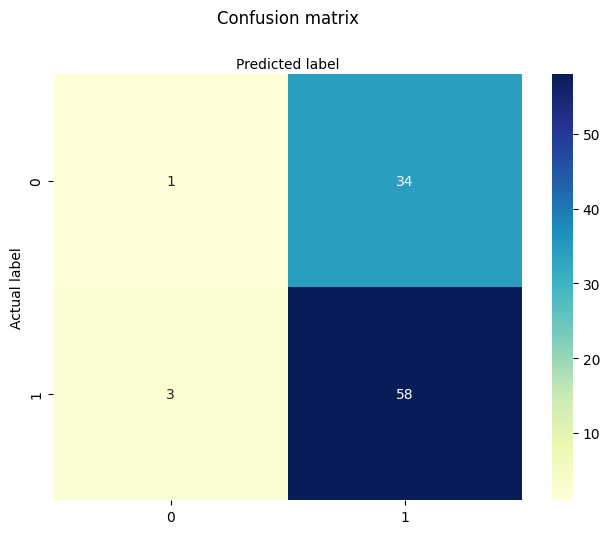

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **F. EXPERIMENT (Boosting Accuracy)**

Tanpa melakukan perubahan pada **sekuensial layer, fitur, persentase split dan konfigurasi model** dari **Source Code Template**, hasil akurasi yang ditemukan adalah **61%**.

Pada percobaan ini, akan dilakukan pendekatan lain dengan menggunakan kombinasi teknik **SMOTE** dan **Min-Max Scaling**, dimana kedua teknik ini akan berperan masing-masing untuk:

1. **SMOTE (Synthetic Minority Over-sampling Technique)**
   - Mengatasi masalah ketidakseimbangan kelas dalam dataset, khususnya pada masalah klasifikasi di mana kelas minoritas memiliki frekuensi yang rendah.
   - Meningkatkan kinerja model dengan menyediakan sampel tambahan untuk kelas minoritas, sehingga mencegah model dari overfitting terhadap kelas mayoritas.
   Memastikan bahwa distribusi kelas dalam dataset lebih seimbang, sehingga model yang dibangun akan lebih baik dalam memprediksi kelas minoritas.

2. **MinMax Scaling**
   - Mengubah fitur-fitur numerik dalam rentang yang sama (biasanya antara 0 dan 1), yang membantu dalam mengurangi perbedaan skala di antara fitur-fitur tersebut.
   - Memperbaiki stabilitas dan interpretasi model, karena mengurangi efek variabel yang memiliki skala yang sangat berbeda-beda.

Sederhananya, **SMOTE** membantu menangani masalah ketidakseimbangan kelas, sementara **Min-Max Scaling** membantu dalam mengatasi masalah skala fitur yang tidak seimbang.

In [135]:
# ISOLATED!!!
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

loan_smote = pd.read_csv("/content/drive/MyDrive/Datasets/Loan_Dataset.csv")
loan_smote = drop_missing_rows(loan_smote.copy())
loan_smote = drop_column(loan_smote.copy(), "Loan_ID")
loan_smote = preprocess_loan_data(loan_smote.copy())

feature_cols = ['Gender',	'Married',	'Dependents',	'Education',	'Self_Employed',	'ApplicantIncome',
                'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term',	'Credit_History',	'Property_Area']

X = loan_smote[feature_cols]
Y = loan_smote.Loan_Status

X, Y = SMOTE().fit_resample(X, Y)
X = MinMaxScaler().fit_transform(X)
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

Dengan tetap menggunakan **layer** dan **konfigurasi** yang sama pada template.

In [136]:
model = Sequential()
model.add(Dense(12, input_dim=11, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 12)                144       
                                                                 
 dense_53 (Dense)            (None, 8)                 104       
                                                                 
 dense_54 (Dense)            (None, 16)                144       
                                                                 
 dense_55 (Dense)            (None, 1)                 17        
                                                                 
Total params: 409 (1.60 KB)
Trainable params: 409 (1.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [137]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=100, batch_size=10)

Epoch 1/100
54/54 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.5009
Epoch 2/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6608 - accuracy: 0.6591
Epoch 3/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6319 - accuracy: 0.7156
Epoch 4/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5989 - accuracy: 0.7062
Epoch 5/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5699 - accuracy: 0.7326
Epoch 6/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5471 - accuracy: 0.7476
Epoch 7/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5388 - accuracy: 0.7589
Epoch 8/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5275 - accuracy: 0.7495
Epoch 9/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5197 - accuracy: 0.7684
Epoch 10/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5050 - accuracy: 0.7627
Epoch 11/

In [138]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred=(model.predict(X_test) > 0.5).astype(int)
# print(Y_pred)

print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred, zero_division=1))

5/5 [==============================] - 0s 2ms/step
[[50 18]
 [ 7 58]]
              precision    recall  f1-score   support

           0       0.88      0.74      0.80        68
           1       0.76      0.89      0.82        65

    accuracy                           0.81       133
   macro avg       0.82      0.81      0.81       133
weighted avg       0.82      0.81      0.81       133



Text(0.5, 427.9555555555555, 'Predicted label')

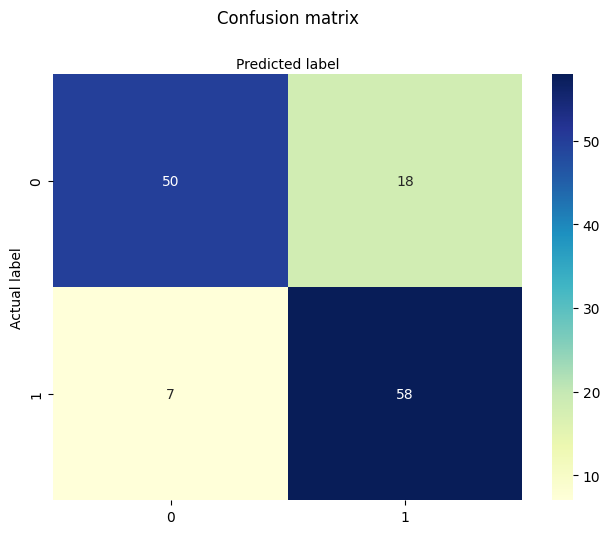

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
cnf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Melalui percobaan pendekatan ini, nilai akurasi bisa lebih ditingkatkan dari sebelumnya **61%** menjadi **81%** pada percobaan pertama.


Demikian laporan tugas ini dibuat.

<br/>
Salam hormat,<br/>
Novianto Rahmadi (22.55.2293)